<a href="https://colab.research.google.com/github/carlin1994/Semana-Carrera-Tech-ALURA/blob/main/credito_banco_inmercion_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INMERCION DE DATOS CON PYTHON

# **1. Configuración del Ambiente**

In [56]:
# prompt: IMPORTA LOS SIGUIENTES MóDULOS CON SUS RESPECTIvOS ALIAS:PANDAS, MATPLOTLIB, SEABORN, DRIVE DE GOOGLE COLAB, WARNINGS.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

drive.mount('/content/drive')
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Preprocesamiento de Datos**

In [57]:
pd.set_option('display.max_columns',None)
global df_banco, resultados


In [58]:
df_banco = pd.read_csv('/content/drive/MyDrive/Inmersion_Datos/german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [59]:
df_banco.shape

(1000, 21)

In [60]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [61]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [62]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
for columnas in columnas:
  print(f'el nombre de la columna: { columnas}')
  print (list(df_banco[f'{columnas}'].value_counts().index))
  print('\n')

el nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


el nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


el nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


el nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


el nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


el nombre de la columna: personal_status_sex
['male : single', 'femal

In [63]:
#dic = {'yes':1,'no':0}
#df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
#df_banco['foreign_worker']

In [64]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [65]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
692,0,2,24,3,5,2896,4,4,2,3,1,1,3,29,3,2,1,3,1,0,1
424,1,2,12,3,4,2762,1,1,1,2,1,2,2,25,1,2,1,3,1,1,1
388,0,2,15,5,10,2326,3,3,2,3,1,4,3,27,1,2,1,3,1,0,1


## 3. Exploración de Datos

In [66]:
variables_discretas = ['personal_status_sex','age',
                       'duration_in_month','credit_amount','default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [67]:
dic_sexo = {2:1,5:1,1:0,3:0,4:0}
df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)


In [68]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [69]:
feature_engineering()
df_banco.head(3)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3


In [70]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


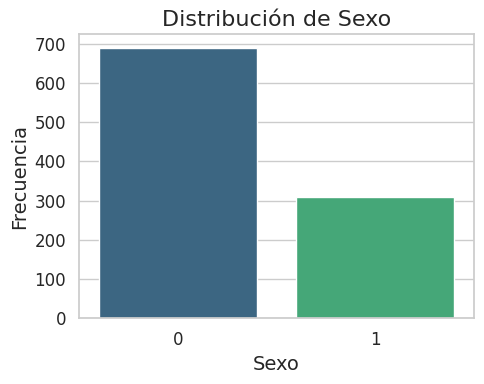

In [71]:
# Configuración de estilo para seaborn
sns.set(style="whitegrid")

# Conteo de frecuencias por categoría de 'sexo'
sexo_counts = df_banco['sexo'].value_counts()

# Crear el histograma
plt.figure(figsize=(5, 4))
sns.barplot(x=sexo_counts.index, y=sexo_counts.values, palette='viridis')

# Etiquetas y título del gráfico
plt.title('Distribución de Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [72]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

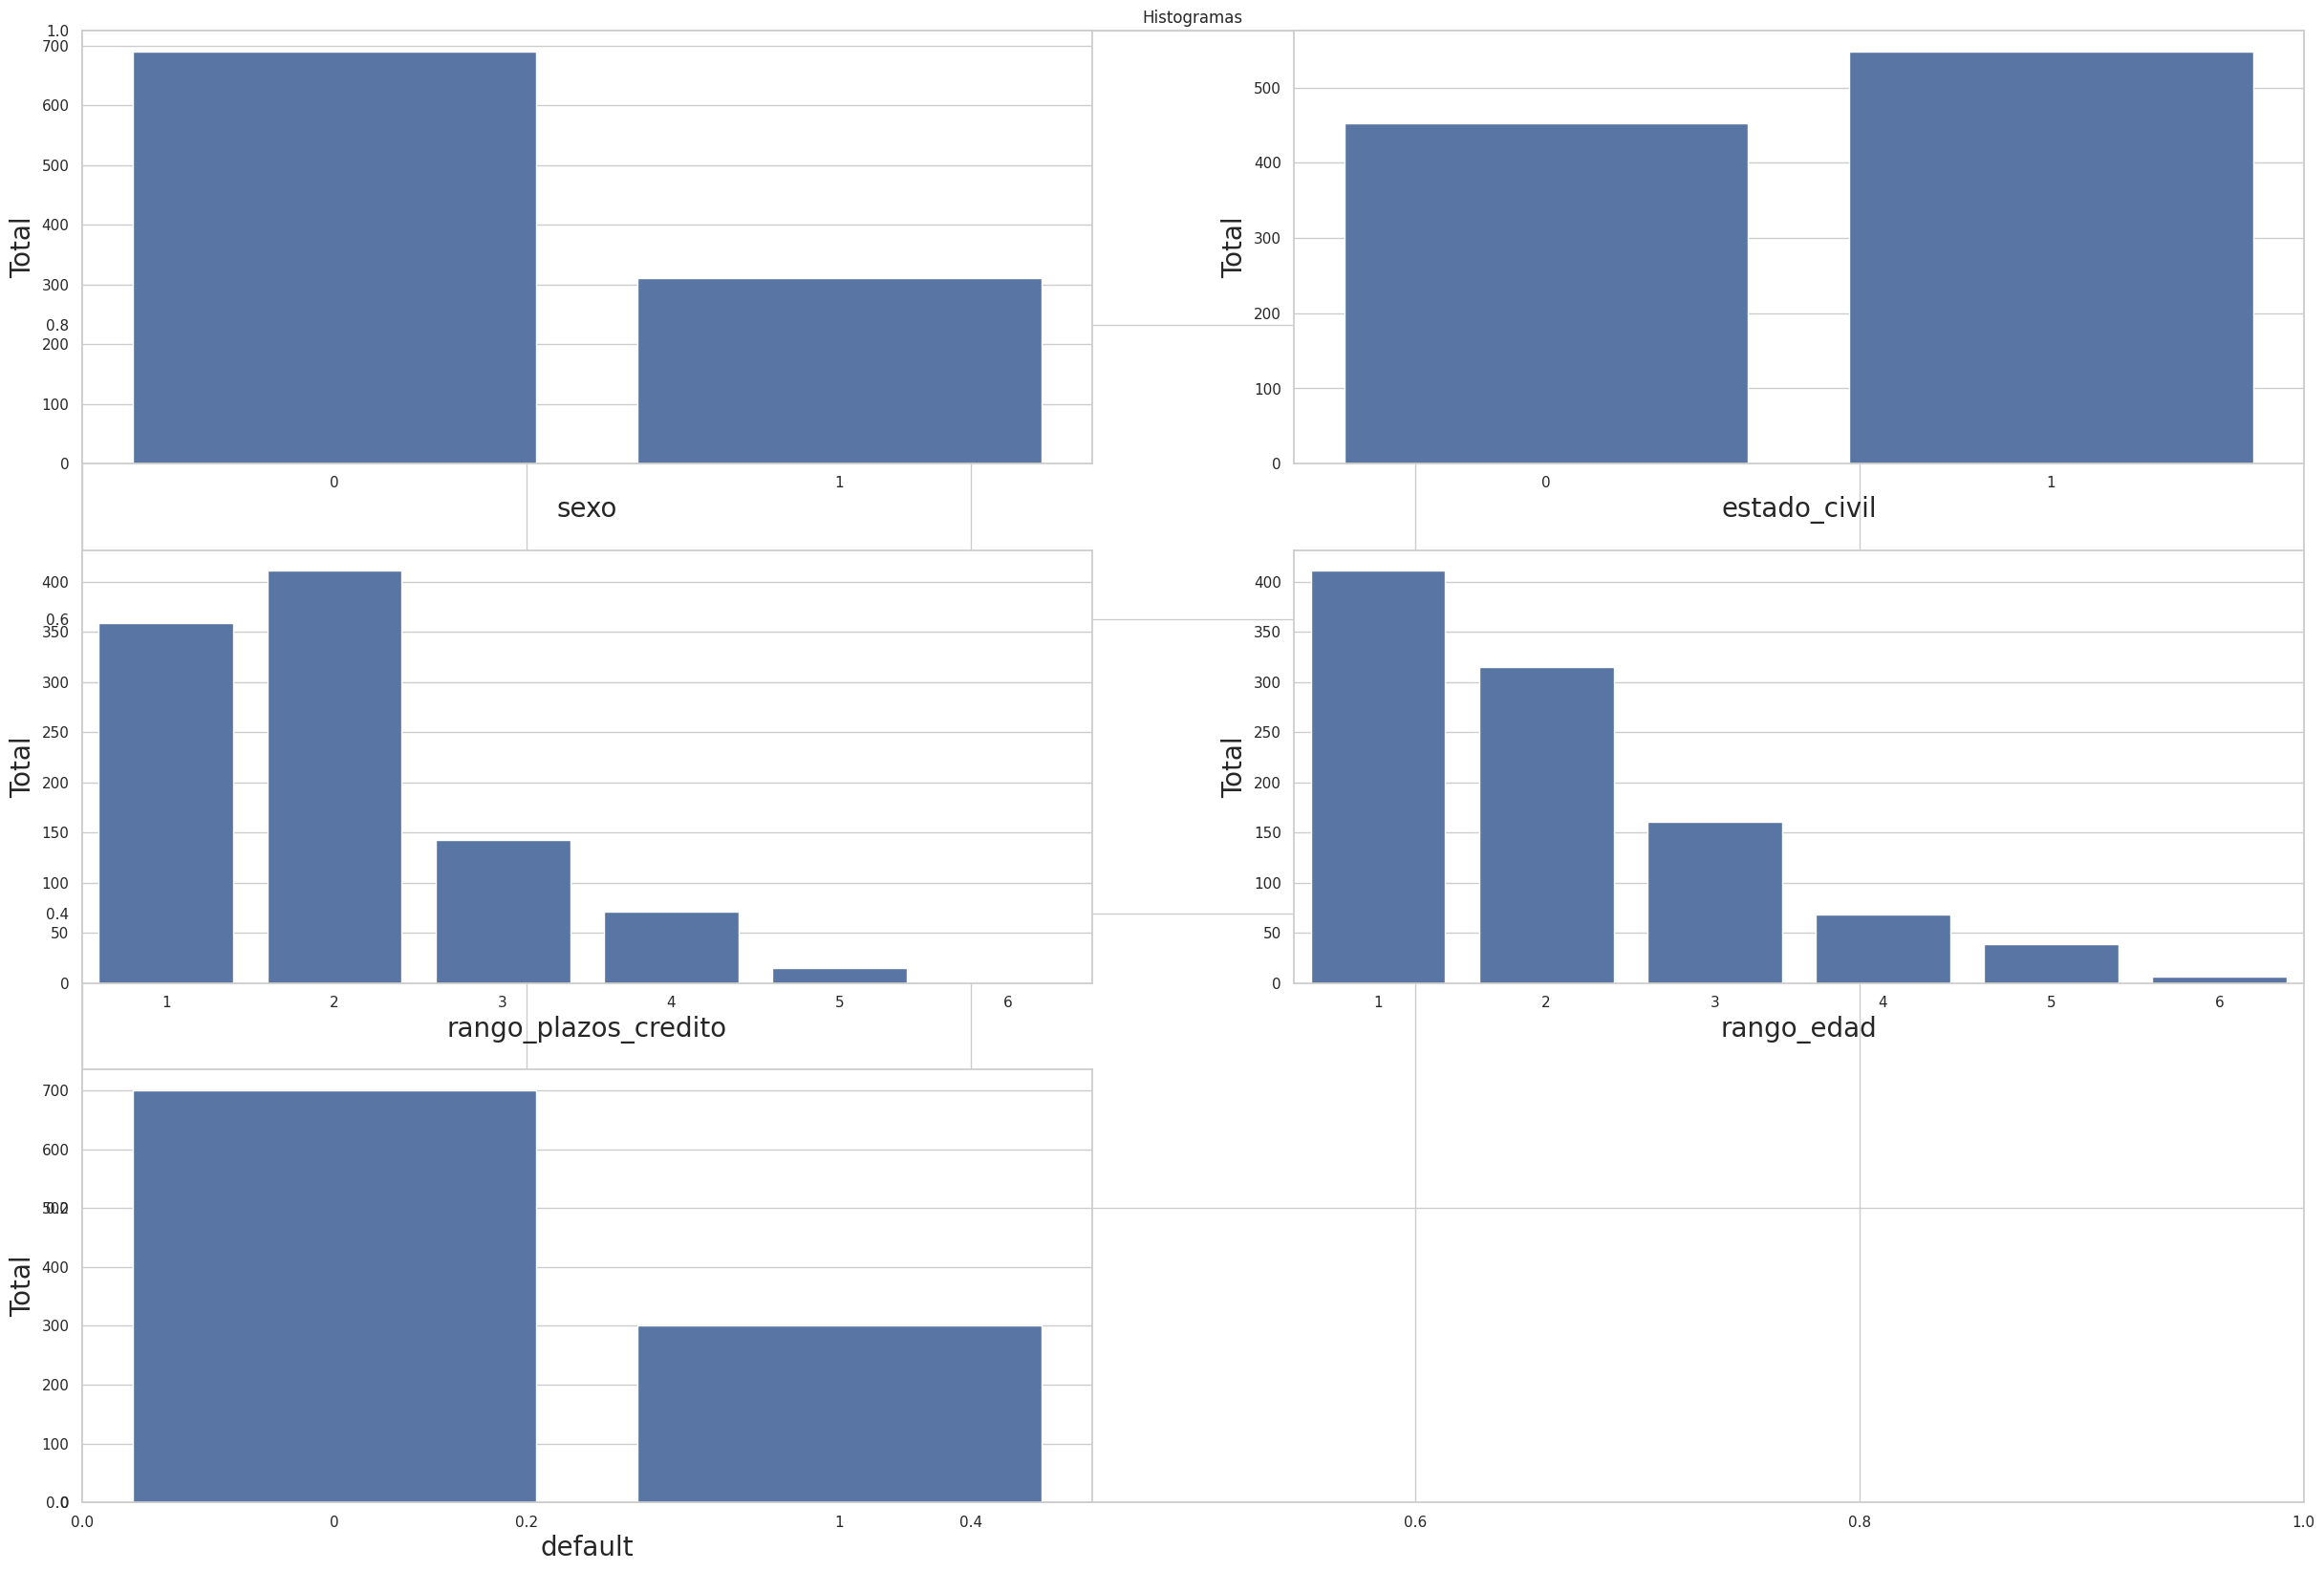

In [73]:
analisis_exploratorio()

# **Desafíos**

1.Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.

2.Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.

3.Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial.

In [97]:
def analizar_distribuciones():
    """
    Analiza las distribuciones de las variables en el DataFrame df_banco
    e identifica valores o registros atípicos que no deberían considerarse
    en el modelo.
    """
    global df_banco

    # Ejemplo: Análisis de la variable 'rango_edad'
    print("Análisis de la variable 'rango_edad':")
    print(df_banco['rango_edad'].value_counts())

    # Verificar si hay rangos de edad con muy pocas observaciones
    # (por ejemplo, menos de 5) y considerar eliminarlos o agruparlos.
    # Este umbral de 5 es un ejemplo, puede ajustarse según el criterio.
    umbral = 5
    rangos_poco_frecuentes = df_banco['rango_edad'].value_counts()[df_banco['rango_edad'].value_counts() < umbral].index
    print(f"\nRangos de edad con menos de {umbral} observaciones: {rangos_poco_frecuentes.tolist()}")

    # ... Similarmente para las demás variables: 'estado_civil', 'rango_plazos_credito', etc.

    # Ejemplo para 'rango_plazos_credito':
    print("\nAnálisis de la variable 'rango_plazos_credito':")
    print(df_banco['rango_plazos_credito'].value_counts())
    rangos_plazos_poco_frecuentes = df_banco['rango_plazos_credito'].value_counts()[
        df_banco['rango_plazos_credito'].value_counts() < umbral].index
    print(f"\nRangos de plazos de crédito con menos de {umbral} observaciones: {rangos_plazos_poco_frecuentes.tolist()}")


    # También se pueden analizar variables numéricas para detectar outliers
    # mediante diagramas de caja (boxplots) o calcular el rango intercuartil (IQR).

    # ...

    # En base a este análisis, se pueden tomar decisiones sobre:
    # - Eliminación de registros
    # - Agrupación de categorías
    # - Transformación de variables
    # - Imputación de valores perdidos (si los hubiera)


# Llamar a la función para realizar el análisis
analizar_distribuciones()

Análisis de la variable 'rango_edad':
rango_edad
1    411
2    315
3    161
4     68
5     39
6      6
Name: count, dtype: int64

Rangos de edad con menos de 5 observaciones: []

Análisis de la variable 'rango_plazos_credito':
rango_plazos_credito
2    411
1    359
3    143
4     71
5     15
6      1
Name: count, dtype: int64

Rangos de plazos de crédito con menos de 5 observaciones: [6]


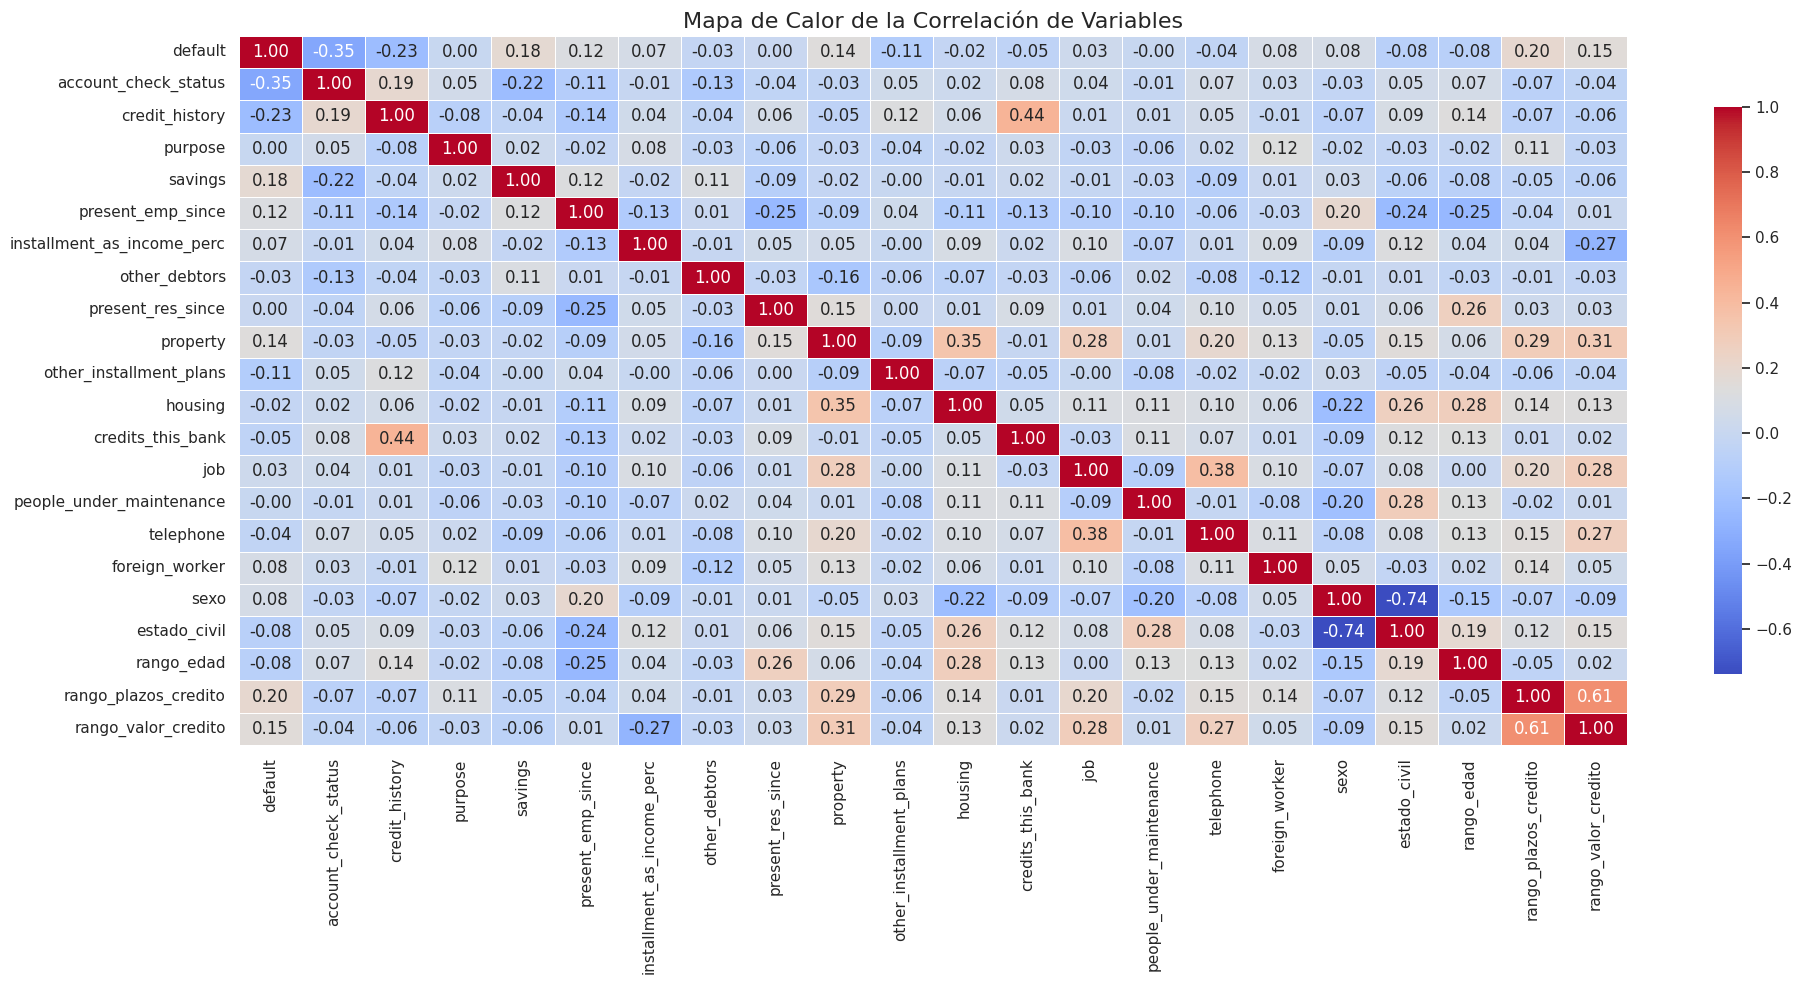

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes un dataframe 'df_banco'
# Calculamos la matriz de correlación de las variables numéricas
corr_matrix = df_banco.corr()

# Crear el mapa de calor
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Configuración del título y el gráfico
plt.title('Mapa de Calor de la Correlación de Variables', fontsize=16)
plt.tight_layout()
plt.show()


In [98]:
def conclusiones_histogramas():
    """
    Proporciona conclusiones para cada histograma generado en el análisis exploratorio.
    """
    print("Conclusiones de los Histogramas:")

    print("\n1. Histograma de Sexo:")
    print("  - Hay una mayor cantidad de hombres solicitantes de créditos en comparación con las mujeres.")
    print("  - Esta disparidad de género podría ser un factor relevante para análisis posteriores.")


    print("\n2. Histograma de Estado Civil:")
    print("  - La mayor parte de los solicitantes son solteros.")
    print("  - Es importante considerar cómo el estado civil podría influir en la capacidad de pago.")

    print("\n3. Histograma de Rango de Plazos de Crédito:")
    print("  - Existe una concentración de créditos con plazos de entre 1 y 12 meses.")
    print("  - Otros plazos de crédito son menos frecuentes, lo cual se puede analizar más profundamente")

    print("\n4. Histograma de Rango de Edad:")
    print("  - La mayoría de los solicitantes de créditos se encuentran en el rango de 25 a 40 años.")
    print("  - Es necesario investigar el impacto de la edad en la capacidad de pago.")

    print("\n5. Histograma de Default (Incumplimiento):")
    print("  - La mayoría de los solicitantes no han incumplido con sus pagos, pero hay una cantidad considerable que sí lo han hecho.")
    print("  - Es fundamental identificar las variables que puedan estar relacionadas con el incumplimiento para la creación de un modelo predictivo.")

conclusiones_histogramas()

Conclusiones de los Histogramas:

1. Histograma de Sexo:
  - Hay una mayor cantidad de hombres solicitantes de créditos en comparación con las mujeres.
  - Esta disparidad de género podría ser un factor relevante para análisis posteriores.

2. Histograma de Estado Civil:
  - La mayor parte de los solicitantes son solteros.
  - Es importante considerar cómo el estado civil podría influir en la capacidad de pago.

3. Histograma de Rango de Plazos de Crédito:
  - Existe una concentración de créditos con plazos de entre 1 y 12 meses.
  - Otros plazos de crédito son menos frecuentes, lo cual se puede analizar más profundamente

4. Histograma de Rango de Edad:
  - La mayoría de los solicitantes de créditos se encuentran en el rango de 25 a 40 años.
  - Es necesario investigar el impacto de la edad en la capacidad de pago.

5. Histograma de Default (Incumplimiento):
  - La mayoría de los solicitantes no han incumplido con sus pagos, pero hay una cantidad considerable que sí lo han hecho.
  - 

# **4. Construcción de Modelos**

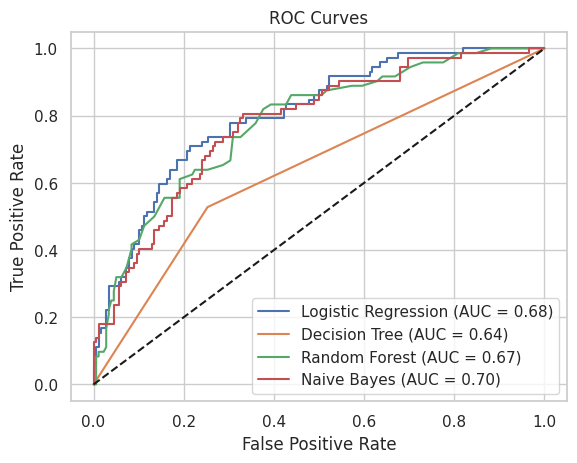


Logistic Regression:
accuracy: 0.7720
precision: 0.6471
recall: 0.4583
f1: 0.5366
roc_auc: 0.6786

Decision Tree:
accuracy: 0.6840
precision: 0.4578
recall: 0.5278
f1: 0.4903
roc_auc: 0.6375

Random Forest:
accuracy: 0.7720
precision: 0.6667
recall: 0.4167
f1: 0.5128
roc_auc: 0.6662

Naive Bayes:
accuracy: 0.7240
precision: 0.5169
recall: 0.6389
f1: 0.5714
roc_auc: 0.6987


In [77]:
# prompt: train_test_split, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming 'default' is your target variable and other columns are features
X = df_banco.drop('default', axis=1)
y = df_banco['default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
   }


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_pred)
    }

    # ROC Curve (optional)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["roc_auc"]:.2f})')

 # Diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


# Print results
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
      print(f"{metric}: {value:.4f}")

# **5. Evaluación y Selección del Modelo**

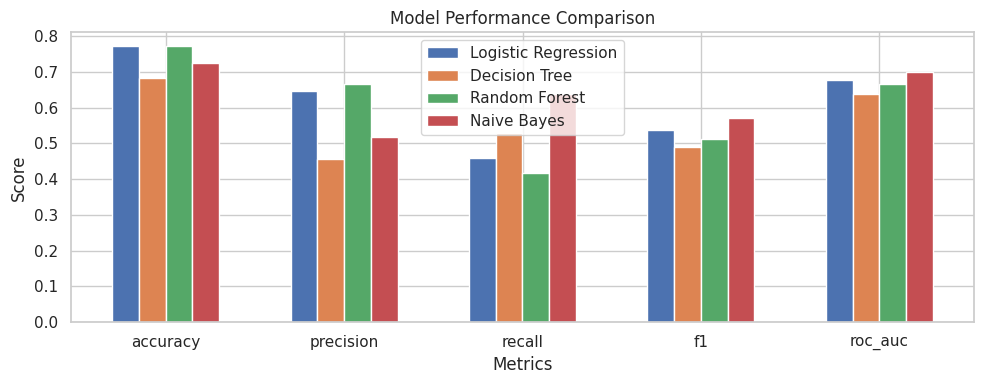

In [80]:
# prompt: como generar un gráfico de barras a partir de un dataframe train_test_split, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

# Assuming 'results' dictionary is already populated as in your original code

metrics = list(results['Logistic Regression'].keys())  # Get the metric names
model_names = list(results.keys())

# Create a figure and axes for the bar plot
fig, ax = plt.subplots(figsize=(10, 4))

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
x = range(len(metrics))

# Iterate through each model and plot its performance for each metric
for i, model_name in enumerate(model_names):
  y = [results[model_name][metric] for metric in metrics]
  positions = [val + i * bar_width for val in x] #adjust the position for each bar group
  ax.bar(positions, y, bar_width, label=model_name)

# Add labels and title
ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks([val + bar_width * (len(model_names)-1) / 2 for val in x]) # center the xticks between bars
ax.set_xticklabels(metrics)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout() # improve spacing
plt.show()

# **Desafíos:**

1.Evaluar la Matrix de Confusión

2.Balancear la variable target

3.Seleccionar sólo algunas variable y reevaluar

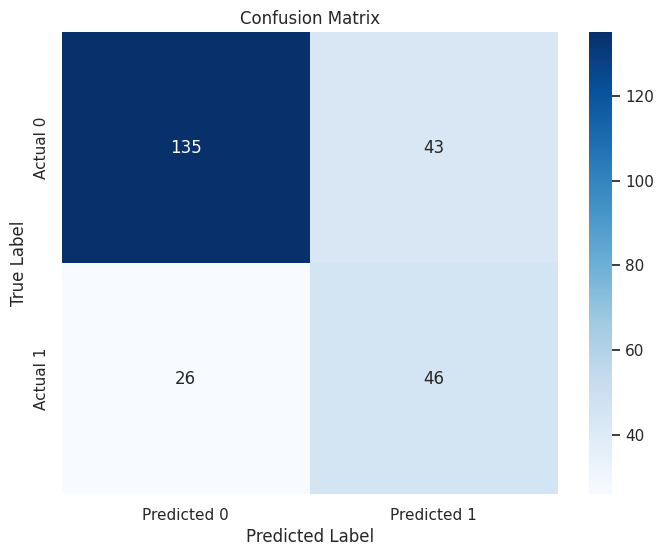

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined for a specific model
# Example:  y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [87]:
# Identify the target variable and its distribution
target_variable = 'default'
print(df_banco[target_variable].value_counts())

# Function to balance the target variable using SMOTE
from imblearn.over_sampling import SMOTE

def balance_target(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled


# ... (Your existing code)

# Split data into training and testing sets
X = df_banco.drop(target_variable, axis=1)
y = df_banco[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Balance the target variable in the training set
X_train_balanced, y_train_balanced = balance_target(X_train, y_train)


# Initialize and train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced) # Use balanced training data
    y_pred = model.predict(X_test)

    # ... (Rest of your model evaluation code)

default
0    700
1    300
Name: count, dtype: int64


   sexo  estado_civil  rango_plazos_credito  default
0     0             1                     1        0
1     1             0                     4        1
2     0             1                     1        0
3     0             1                     4        0
4     0             1                     2        1


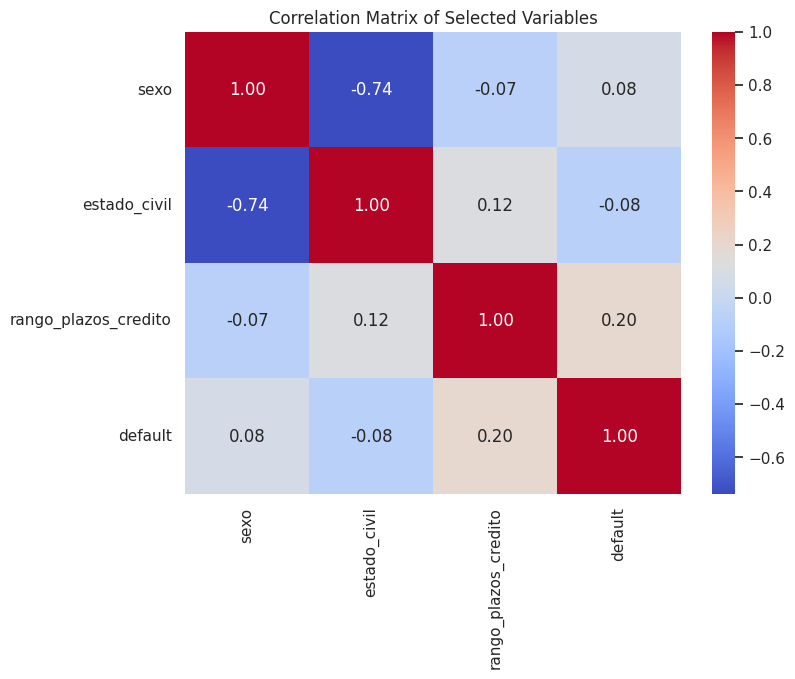

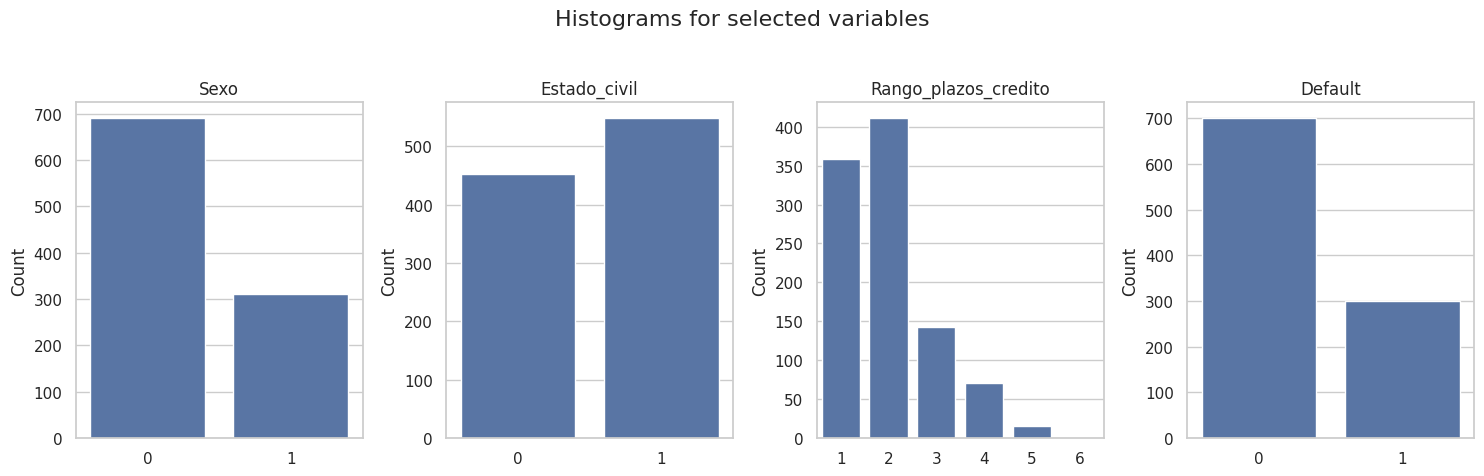

In [91]:
# prompt: Seleccionar sólo algunas variable y reevaluar

# Select specific variables for re-evaluation
selected_variables = ['sexo', 'estado_civil', 'rango_plazos_credito', 'default']

# Create a new DataFrame with only the selected variables
df_selected = df_banco[selected_variables]

# Now you can perform further analysis or modeling using df_selected
# Example: Display the first few rows of the selected DataFrame
print(df_selected.head())


# Example: Recalculate the correlation matrix for the selected variables
corr_matrix_selected = df_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Variables")
plt.show()

# Example: Create histograms for selected variables
analisis_exploratorio_selected = ['sexo', 'estado_civil', 'rango_plazos_credito', 'default']
plt.figure(figsize=(15, 5))  # Adjust figure size as needed
plt.suptitle('Histograms for selected variables', fontsize = 16)

for i, variable in enumerate(analisis_exploratorio_selected):
    plt.subplot(1, 4, i+1)
    sns.countplot(x=variable, data=df_selected)
    plt.title(variable.capitalize())
    plt.xlabel('') # Remove x-axis labels for cleaner look
    plt.ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()